# Model Evaluation for Strawberry Price Prediction

This notebook evaluates models trained with different interpolation methods.

In [7]:
import pandas as pd
import numpy as np
import joblib

from src.fct_evaluation import *
from src.parameter import get_dict_params

## 1. Load Models and Predictions

In [8]:
# Load parameters
dict_params = get_dict_params()
interpolation_methods = dict_params['interpolation_methods']
model_types = dict_params['model_types']

# Load predictions for each interpolation method
predictions_by_method = {}
test_data_by_method = {}

for method in interpolation_methods:
    # Load test data
    test_data_by_method[method] = joblib.load(f'models/test_data_{method}.joblib')
    
    # Load predictions
    predictions_by_method[method] = {
        f"{model_type}": joblib.load(f'models/{model_type}_{method}_predictions.joblib')
        for model_type in model_types
    }

## 2. Evaluate Models by Interpolation Method


Evaluating models with mean interpolation:


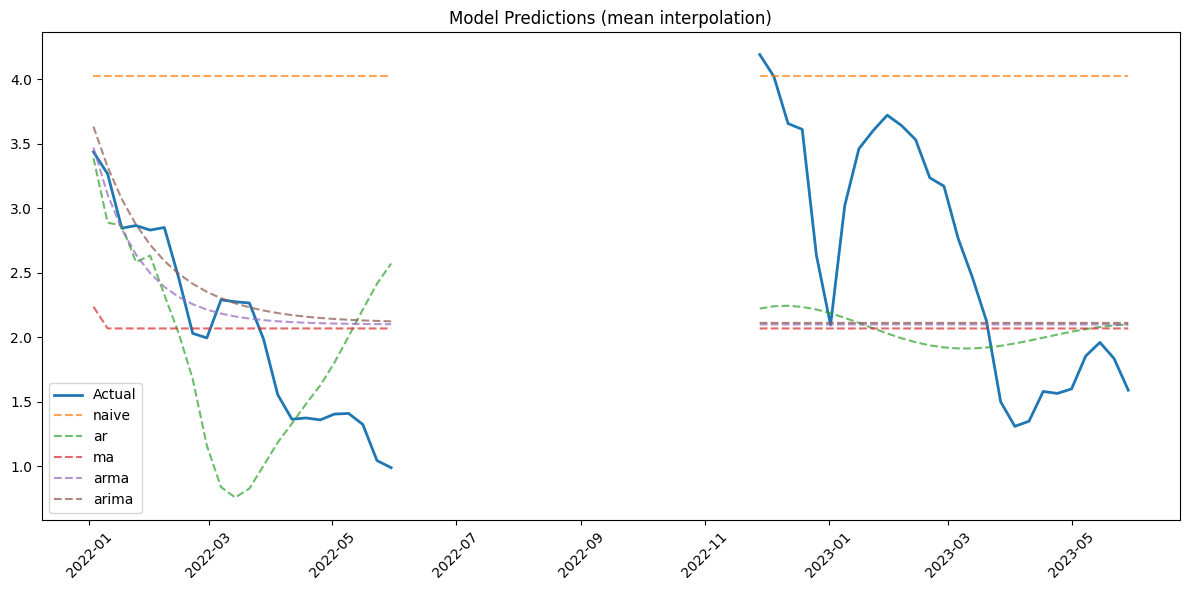

ValueError: Input contains NaN.

In [9]:
results_by_method = {}

for method in interpolation_methods:
    print(f"\nEvaluating models with {method} interpolation:")
    
    # Get test data and predictions for current method
    test_ts = test_data_by_method[method]
    predictions = predictions_by_method[method]
    
    # Plot predictions
    plot_predictions(test_ts, predictions, f"Model Predictions ({method} interpolation)")
    
    # Evaluate models
    results = evaluate_all_models(test_ts, predictions)
    results_by_method[method] = results
    
    print("\nModel Performance Metrics:")
    print(results['metrics'])

## 3. Compare Interpolation Methods

In [ ]:
# Compile best models from each method
best_models = {}
for method in interpolation_methods:
    rankings = results_by_method[method]['rankings']
    best_model = rankings.index[0]
    best_models[method] = {
        'model': best_model,
        'metrics': results_by_method[method]['metrics'].loc[best_model]
    }

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    method: data['metrics']
    for method, data in best_models.items()
}).T

print("Best Model Comparison Across Interpolation Methods:")
print(comparison_df)

# Plot comparison
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar')
plt.title('Best Model Performance by Interpolation Method')
plt.xlabel('Interpolation Method')
plt.ylabel('Error Metric Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

## 4. Seasonal Analysis of Best Models

In [ ]:
# Compare seasonal performance of best models
best_predictions = {}
for method in interpolation_methods:
    best_model = best_models[method]['model']
    best_predictions[f"{method}_{best_model}"] = predictions_by_method[method][best_model]

# Use test data from rolling method as reference
test_ts = test_data_by_method['rolling']
seasonal_performance = analyze_seasonal_performance(test_ts, best_predictions)

print("\nSeasonal Performance of Best Models:")
print(seasonal_performance)

## 5. Conclusions

Analysis of different interpolation methods:

1. Overall Performance:
   - Compare which interpolation method led to better model performance
   - Note any consistent patterns across different models

2. Seasonal Impact:
   - How different interpolation methods handle seasonal patterns
   - Which method works better for specific seasons

3. Model Specific Findings:
   - Which models benefit most from each interpolation method
   - Stability of predictions across different methods

4. Recommendations:
   - Best combination of model and interpolation method
   - Trade-offs between different approaches
   - Suggestions for further improvements